In [1]:
import numpy as np
import pandas as pd

from utils.utils import *

from collections import Counter

import matplotlib.pyplot as plt

# https://matplotlib.org/2.0.0/examples/color/named_colors.html

In [2]:
kwargs_data = nice_dict({'mk_chars': True, 
                         'model': 'linear', 
                         'char_filter': 100, 'allowed_chars': None, 
                         'mk_ngrams': False, 'ngram_width': 5, 
                         'ngram_filter': 10, 'allowed_ngrams': None, 
                         'keep_infreq_labels': False, 'label_count_thresh': 10, 
                         'valid_ratio': 0.25, 
                         'scale_func': unscale, 'to_permute': True, 
                         'output_intermediate': True})

In [3]:
def sort_lists(a, b):
    """
    Sorts two lists, with a sorting key based on the first list.
    """
    sorted_lists = sorted(zip(a, b), reverse=False, key=lambda x: x[0])
    a, b = [[x[i] for x in sorted_lists] for i in range(2)]
    return a, b

In [4]:
def plot_dict(input, 
              allowed_set, 
              title,
              plt_width=20, plt_height=10, 
              ylabel='Character frequency\n(normalized to corpus length)',
              log=True, 
              scale_freq=True, 
              histogram=False):
    """
    Plot a dictionary with text keys.
    Dict data will be sorted by keys.
    log plots the data on a log scale (original units).
    allowed_set determines the filter, by which bars would be colored.
    scale_freq scales each character's frequency to the number of characters.
    Use histogram if the output should be a histogram.
    Returns the plt object. Call *.show() or save to file.
    """
    x = np.arange(len(input))
    y = input.values()
    x_lab = input.keys()
    
    x_lab, y = sort_lists(x_lab, y)
    
    x_lab = [elem if elem != '<unk-char>' 
             else '{?}' for elem in x_lab]
    
    # set colors wrt character threshold
    indices = ['royalblue' if elem in allowed_set 
               else 'purple' 
               for elem in x_lab]
    
    if scale_freq:
        y_sum = sum(y)
        y = [elem / y_sum for elem in y]
    
    plt.figure(figsize=(plt_width, plt_height))  # , dpi= 120, facecolor='w', edgecolor='k'
    
    if histogram:  # plot as a histogram
        vals = list(input.values())
        hist, bins = np.histogram(vals, 
                                  bins=np.max(vals))
        width = 1 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        
        indices = ['royalblue' if elem in allowed_set 
                   else 'purple' 
                   for elem in bins]
        
        plt.bar(center, hist, color=indices, align='center', width=width, log=log)
#         plt.xticks(x, x_lab, rotation='horizontal', size=12)
    else:
        plt.bar(x, y, color=indices, log=log)  # , cmap=plt.get_cmap('jet')
        plt.xticks(x, x_lab, rotation='horizontal', size=12)
    
    plt.ylabel(ylabel, fontsize=20, rotation=90)
    plt.title(title, fontsize=26)
    
    return plt

In [5]:
def plot_dicts_sbs (input_1, input_1_name, 
                    input_2, input_2_name,
                    allowed_set, 
                    title,
                    plt_width=20, plt_height=10, 
                    ylabel='Character frequency\n(normalized to corpus length)',
                    log=True, 
                    scale_freq=True):
    """
    Plot a bar plot of two dictionaries with the same key set, side by side.
    Dict data will be sorted by keys.
    log plots the data on a log scale (original units).
    allowed_set determines the filter, by which bars would be colored.
    scale_freq scales each character's frequency to the number of characters.
    Returns the plt object. Call *.show() or save to file.
    """
    width = 0.35       # the width of the bars
    x = np.arange(len(input_1))  # arrange indices for x axis
    
    # input_1
    y_1 = input_1.values()
    x_lab_1 = input_1.keys()
    x_lab_1, y_1 = sort_lists(x_lab_1, y_1)
    
    if scale_freq:  # normalize to size
        y_1_sum = sum(y_1)
        y_1 = [elem / y_1_sum for elem in y_1]    
    
    # fig_1
    fig, ax = plt.subplots(figsize=(plt_width, plt_height), dpi= 120)
    rects1 = ax.bar(x, y_1, width, log=log, color='royalblue')  # , yerr=men_std
    
    # input_1
    y_2 = input_2.values()
    x_lab_2 = input_2.keys()
    x_lab_2, y_2 = sort_lists(x_lab_2, y_2)
    
    if scale_freq:  # normalize to size
        y_2_sum = sum(y_2)
        y_2 = [elem / y_2_sum for elem in y_2]    
    
    # fig_2
    rects2 = ax.bar(x + width, y_2, width, log=log, color='palevioletred')  # , yerr=women_std
    
    assert x_lab_1 == x_lab_2, 'character sets are not identical'
    # aestherics, change the UNKNOWN character
    x_lab_1 = [elem if elem != '<unk-char>' 
             else '{?}' for elem in x_lab_1]
    
    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)
    ax.set_title(title, fontsize=26)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(x_lab_1, rotation='horizontal', size=12)

    ax.legend((rects1[0], rects2[0]), (input_1_name, input_2_name))
#     autolabel(rects1, ax=ax)
#     autolabel(rects2, ax=ax)
    
    return plt

In [6]:
# importing data
x, y, freq, x_suggest, y_suggest, freq_suggest = \
    init_data_suggest()
    
x_unk, x_suggest_unk, _, _, _, _ = \
    data_load_preprocess(**kwargs_data)

_, _, _, main_data = init_data()

In [7]:
# initializing variables for visualization
x_char_orig_all = dict_addition([Counter(obs) 
                            for obs in x])

x_char_suggest_all = dict_addition([Counter(obs) 
                                    for obs in x_suggest])

x_char_orig_filter = dict_addition([Counter(obs) 
                                    for obs in x_unk])

x_char_suggest_filter = dict_addition([Counter(obs) 
                                       for obs in x_suggest_unk])

char_set = x_char_orig_filter.keys()  # "allowed" character set

In [8]:
main_data.head(5)

,FREETXT,CNT,INGR,ATC,BestOutput,EnglishVsGerman,MoreATCs
0,NaCl 0.9%,315067,(Saline solution),B05B,(Sugar solution) or (Ringer's solution and var...,English,NaN
1,Dafalgan (Filmtabl 1 g) / Paracetamol 1000mg,56346,Paracetamol,N02BE01,Paracetamol,English,NaN
2,Fragmin (Inj Lös 5000 E/0.2ml) Fertigspr / Dal...,54330,Dalteparin,B01AB04,Dalteparin,English,NaN
3,Perfalgan (Inf Lös 1 g/100ml) Durchstf / Parac...,54235,Paracetamol,N02BE01,Paracetamol,English,NaN
4,Ringerfundin,53037,(Ringer's solution and variations),B05B,(Sugar solution) or (Ringer's solution and var...,English,NaN


In [9]:
print('Data contains {} "potential" observations.'.format(len(main_data)))
print('However, out of those, only {} have been labeled.'.format(len(x)))
print("We've managed to generate {} additional labeled observations.".
      format(len(x_suggest)))

Data contains 26611 "potential" observations.
However, out of those, only 2028 have been labeled.
We've managed to generate 891 additional labeled observations.


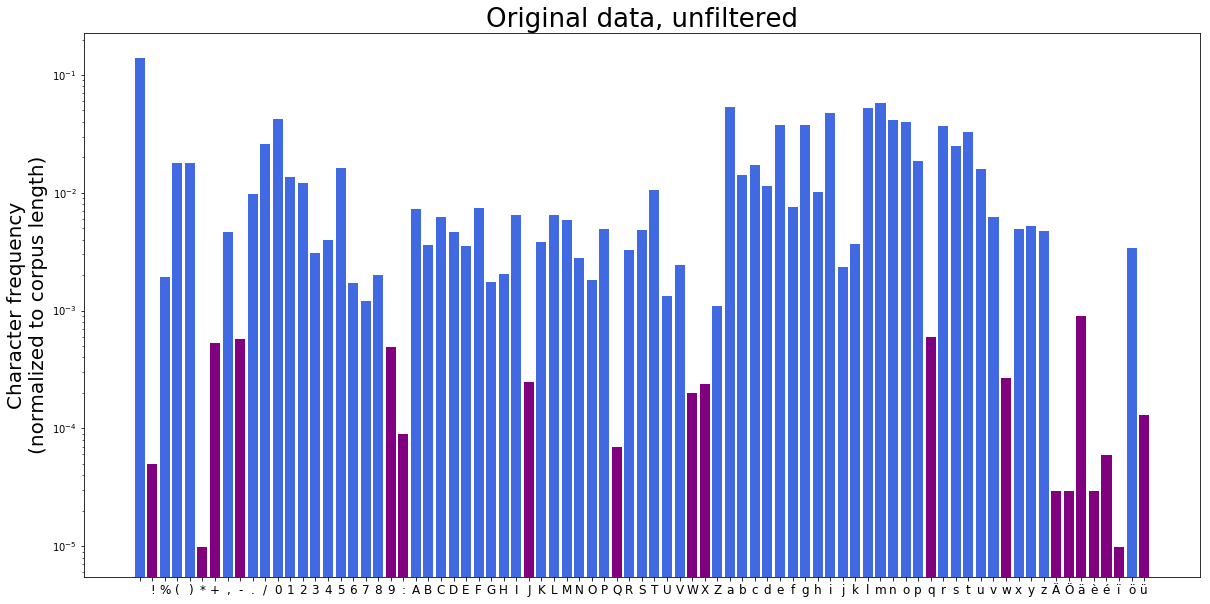

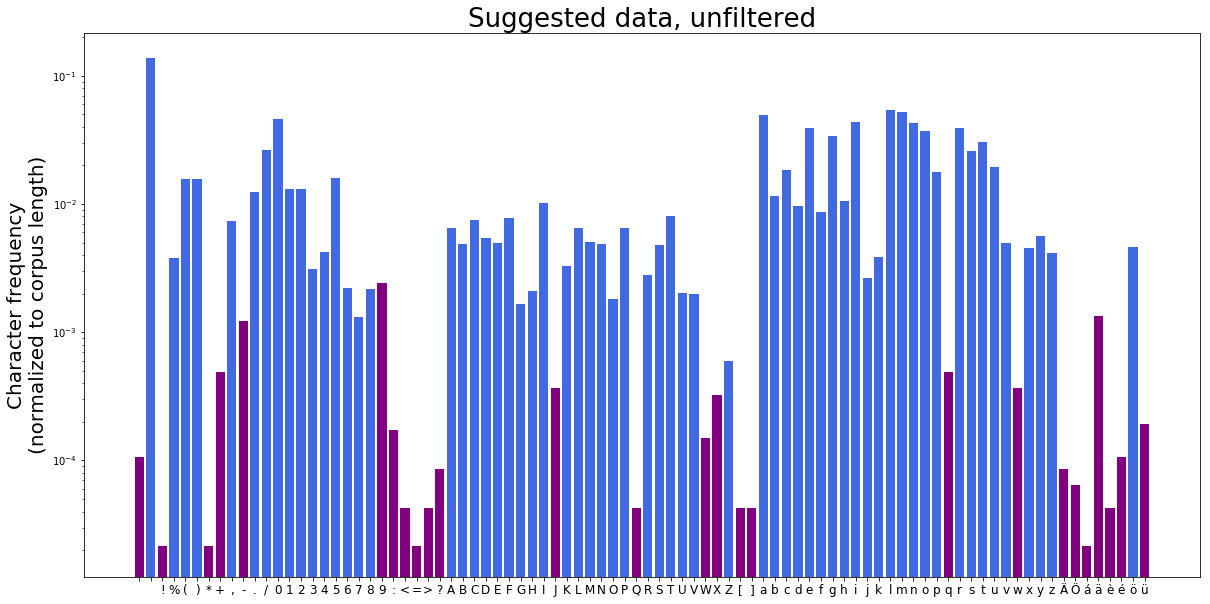

Original data-set had 81 unique Characters.
Suggested data-set had 88 unique Characters.
After applying the character filter, we were left with 63 unique Characters (including <unkown>).


In [10]:
plot_dict(x_char_orig_all, 
          title='Original data, unfiltered', 
          allowed_set=char_set).show()

plot_dict(x_char_suggest_all, 
          title='Suggested data, unfiltered',
          allowed_set=char_set).show()

print('Original data-set had {} unique Characters.'.format(len(x_char_orig_all)))
print('Suggested data-set had {} unique Characters.'.format(len(x_char_suggest_all)))
print('After applying the character filter, we were left with {} unique Characters (including <unkown>).'
      .format(len(char_set)))

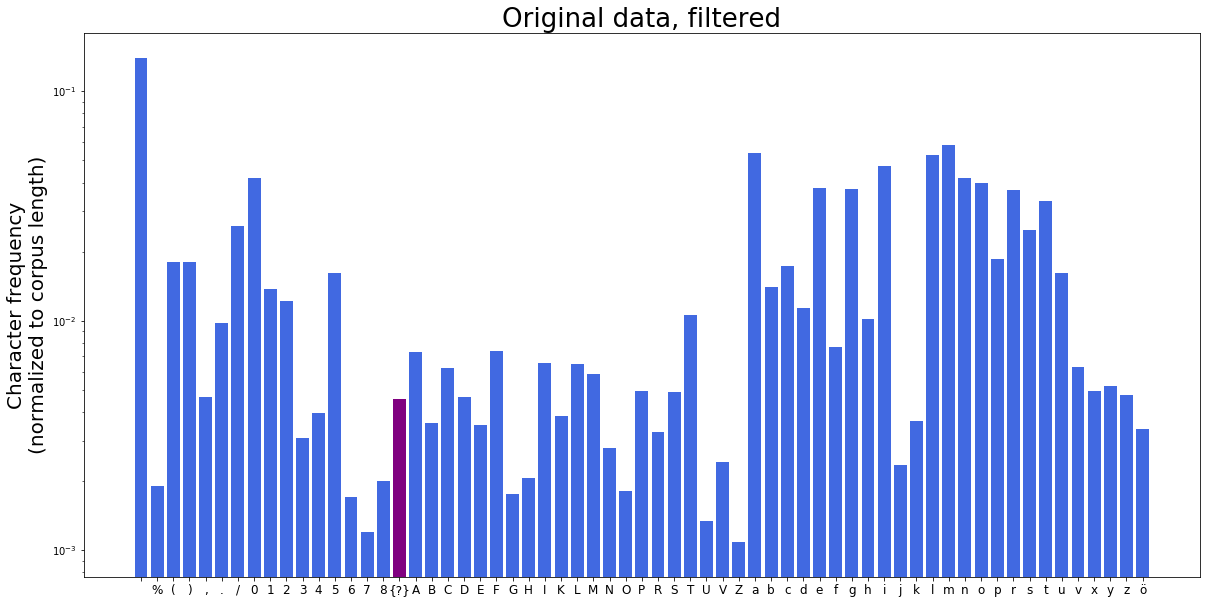

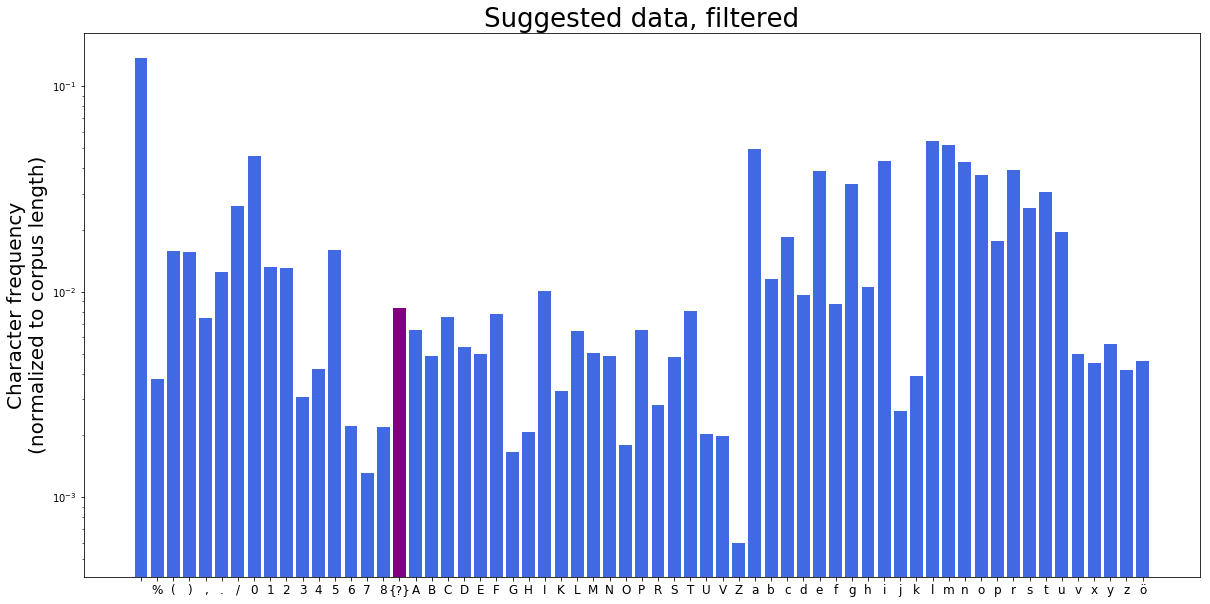

In [11]:
# plt.subplots()

plot_dict(x_char_orig_filter, 
          title='Original data, filtered', 
          allowed_set=char_set)

plot_dict(x_char_suggest_filter, 
          title='Suggested data, filtered', 
          allowed_set=char_set)

plt.show()

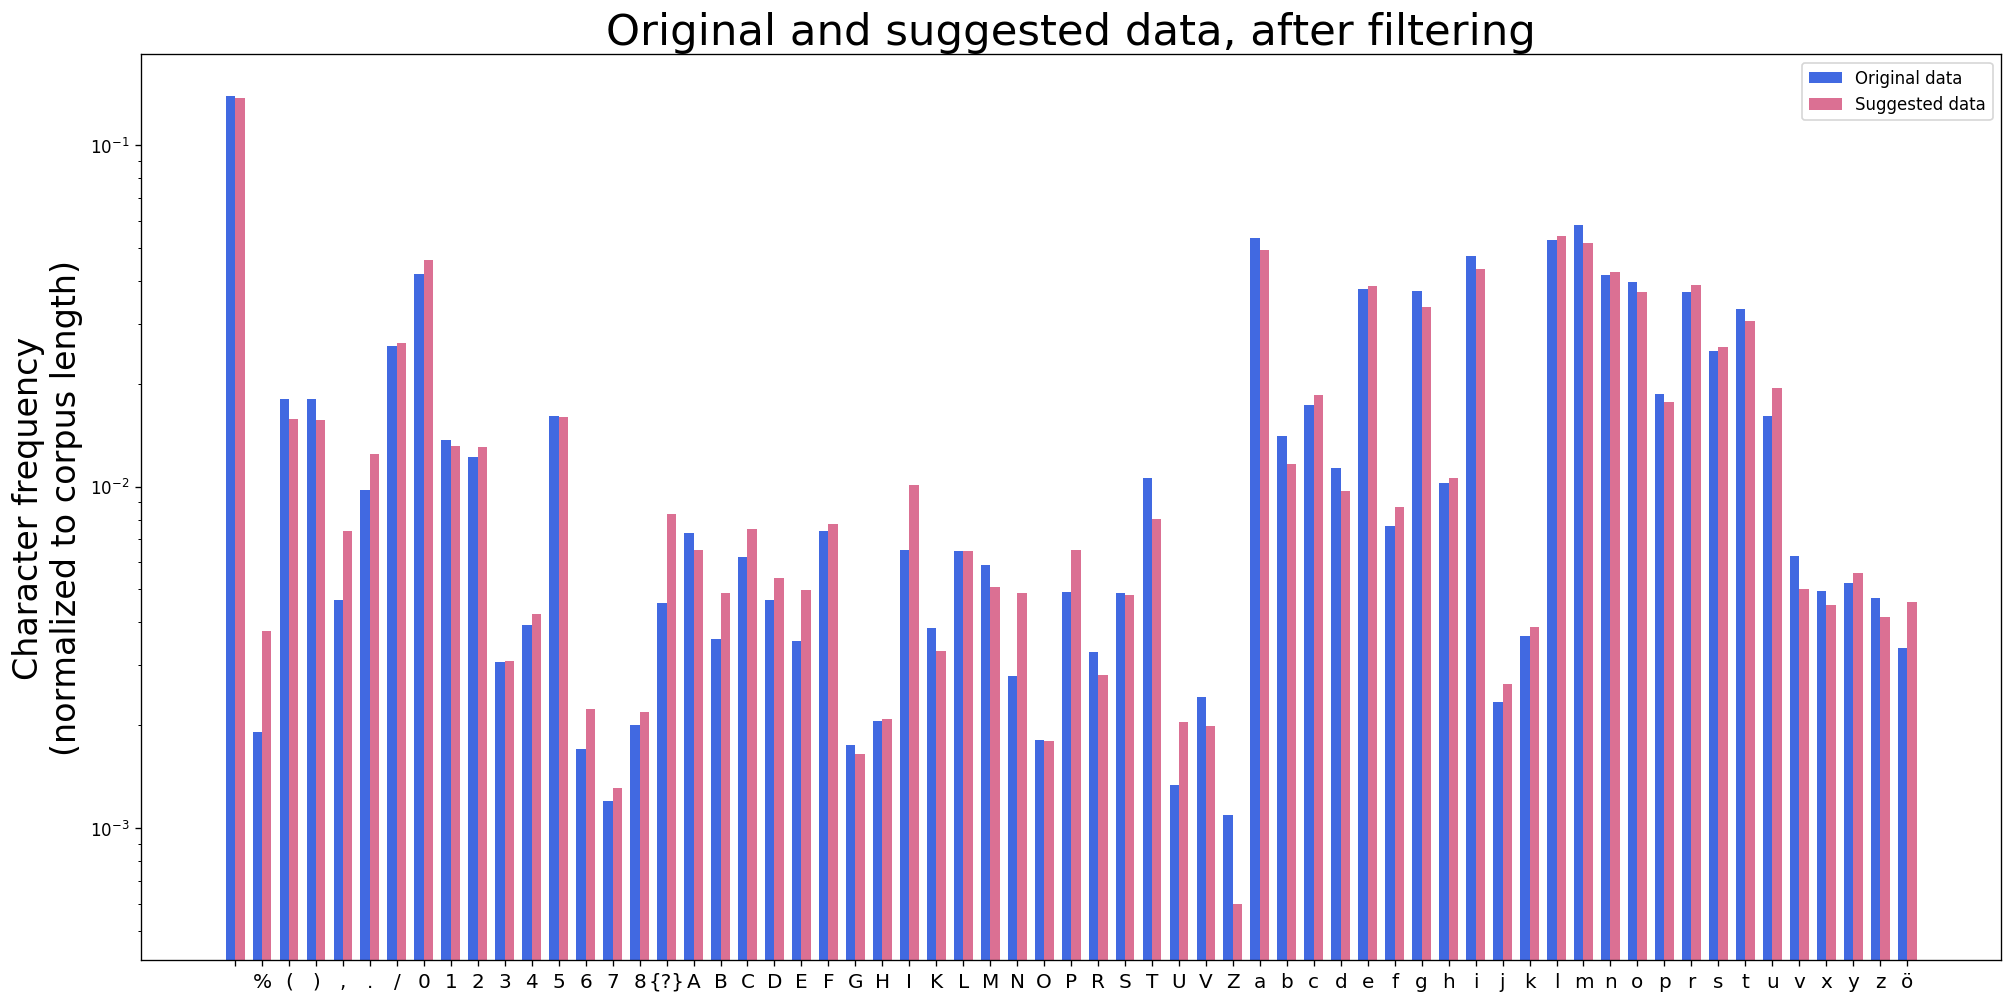

In [12]:
plot_dicts_sbs(x_char_orig_filter, 'Original data',
               x_char_suggest_filter, 'Suggested data',
               allowed_set=char_set, 
               title='Original and suggested data, after filtering').show()

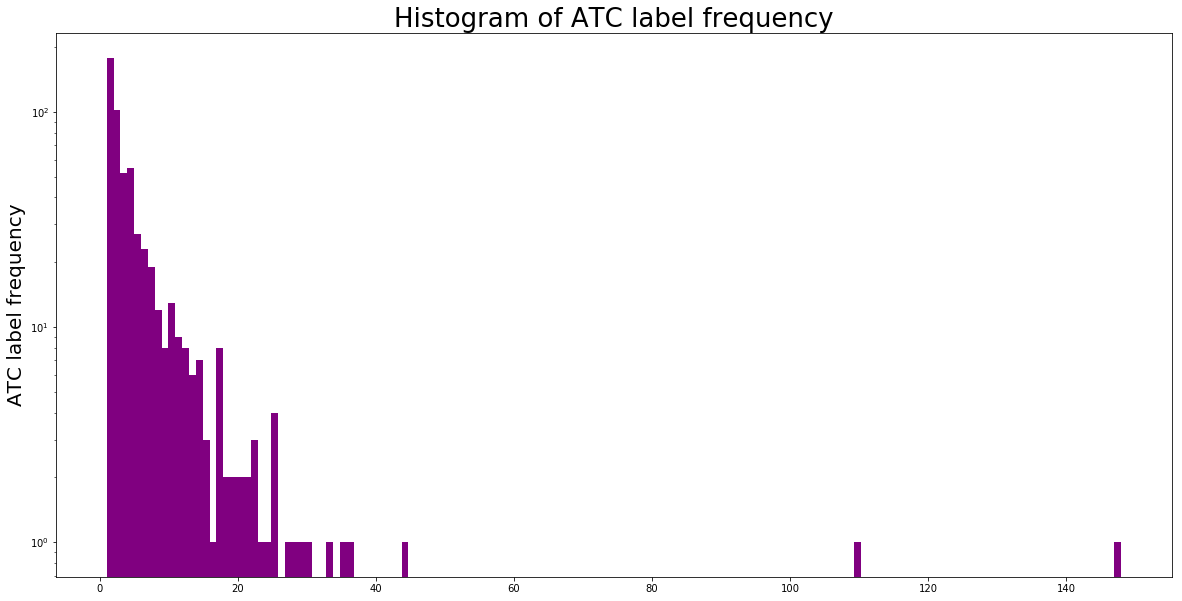

We have 558 different labels, although many of them are infrequent in the data-set
When we only keep labels that appear at least 10 time, we are left with 82 labels and 1587 observations


In [13]:
# visualizing ATC labels histogram
labels = Counter(y + y_suggest)
plot_dict(labels, 
          title='Histogram of ATC label frequency', 
          ylabel='ATC label frequency',
#           allowed_set=[int(j) 
#                        for j in np.linspace(0,
#                            kwargs_data.label_count_thresh, 
#                            kwargs_data.label_count_thresh+1)], 
#             allowed_set=[v for v in labels.values()], 
            allowed_set=[],
          histogram=True).show()

filtered_labels = [v for v in labels.values()
                   if v >= kwargs_data.label_count_thresh]
print('We have {} different labels, although many of them are infrequent in the data-set'
      .format(len(labels)))
print('When we only keep labels that appear at least {} time, we are left with {} labels and {} observations'.
      format(kwargs_data.label_count_thresh, 
             len(filtered_labels),
             sum(filtered_labels)))

In [ ]:
# def plot_exploratory_hist(atc_freq):

#     print(
#         'Number of observations (unique free text fields): {}.'.format(sum(atc_freq.values())), '\n'
#         'Number of ATC labels: {}.'.format(len(atc_freq.keys())), '\n'
#         'Mean number of occurrences per ATC code: {:.3}.'.format(np.mean([float(k) for k in atc_freq.values()]))
#     )

#     atc_label_freq = [v for v in atc_freq.values()]
#     hist, bins = np.histogram(atc_label_freq, 
#                               bins=np.max(atc_label_freq))
#     width = 1 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.bar(center, hist, align='center', width=width)
#     plt.xlabel('Number of label appearance')
#     plt.ylabel('Frequency')
#     plt.title('Historgram of all label appearance')
#     plt.show()

#     # fig, ax = plt.subplots()
#     # ax.bar(center, hist, align='center', width=width)
#     # fig.savefig("1.png")

#     atc_label_freq_filtered = [v for v in atc_freq.values() if v <= 10]
#     hist, bins = np.histogram(atc_label_freq_filtered, 
#                               bins=np.max(atc_label_freq_filtered))
#     width = 1 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.bar(center, hist, align='center', width=width)
#     plt.xlabel('Number of label appearance')
#     plt.ylabel('Frequency')
#     plt.title('Historgram of label appearance, appearing 10 times or less')
#     plt.show()

#     appearing_once_labels = len([one for one in atc_label_freq if one == 1])
#     appearing_5more_labels = len([f for f in atc_label_freq if f >= 5])
#     appearing_10more_labels = len([f for f in atc_label_freq if f >= 10])

#     print('There are {} labels that appear exactly once.'.
#           format(appearing_once_labels, ), 
#           '\nThis leaves {} labels, {} of which appear 5 times or more and {} appearing at least 10 times'.
#           format(len(atc_label_freq) - appearing_once_labels, 
#                  appearing_5more_labels, 
#                  appearing_10more_labels))

#     atc_label_freq_high_filtered = [v for v in atc_freq.values() if v >= 10]

#     hist, bins = np.histogram(atc_label_freq_high_filtered, 
#                               bins=np.max(atc_label_freq_high_filtered))
#     width = 1 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.bar(center, hist, align='center', width=width)
#     plt.xlabel('Number of label appearance')
#     plt.ylabel('Frequency')
#     plt.title('Historgram of label appearance, appearing at least 10 times')
#     plt.show()

In [ ]:
# # initialize data from main (original) CSV file
# x, y, n, main_data = init_data()
# x = [i for i in x]  # converting x to list, for simplicity and consistency

# # initialize data from suggestions CSV file
# x_suggest, y_suggest, freq_suggest = init_data_suggest()
# x_merge, y_merge = x + x_suggest, y + y_suggest

# # create Counter dicts, of the form {element: freq(element)}
# labeled_data_freq = Counter(y)  # for original data
# merged_data_freq = Counter(y_merge)  # for merged data

# print('For labeld (original) data:')
# plot_exploratory_hist(labeled_data_freq)

# print('For the merged data (original data, merged with suggested labels):')
# plot_exploratory_hist(merged_data_freq)

# print('For labeld (original) data:')
# char_dict_x = count_chars_in_text(x)

# print('For the merged data (original data, merged with suggested labels):')
# char_dict_x_merge = count_chars_in_text(x_merge)